In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

data = pd.read_csv('m8.23_gold_clean.csv')
data = data.rename(columns = {'ts': 'unixtime'})
data['ts'] = pd.to_datetime(data.unixtime)
data = data[(data.ts >= '2018-02-10') & (data.ts <= '2018-02-22')]

print(f'len(data) = {len(data)}')
data.head()

#В следующих заданиях требуется делать различные разбиения исходного ряда.

len(data) = 10792


,unixtime,open,high,low,close,vol,ts
39280,1518220800000000000,1316.7,1317.1,1316.7,1317.0,259,2018-02-10 00:00:00
39281,1518220860000000000,1317.0,1317.0,1316.6,1316.7,103,2018-02-10 00:01:00
39282,1518220920000000000,1316.8,1317.1,1316.7,1317.1,139,2018-02-10 00:02:00
39283,1518220980000000000,1317.0,1317.6,1317.0,1317.5,198,2018-02-10 00:03:00
39284,1518221040000000000,1317.6,1318.3,1317.6,1318.1,218,2018-02-10 00:04:00


#### Задание 8.23.1

Сделайте линейное (последовательное) разбиение, используя функцию np.split, в качестве коэффициента разбиения возьмите 0.6 (60% — тренировочный сет, 40% — тестовый). Укажите значение объёма (vol) первой строки тестового сета.

In [12]:
#https://stackoverflow.com/questions/55662700/whats-the-most-efficient-way-to-split-up-a-numpy-ndarray-using-percentage

df = data.copy()
# splitCoef = 0.6 # 60 - тренировочный сет, 40 - тестовый сет

# percentages (ratios) array
p = np.array([0.6, 0.4]) # must sum upto 1
features_train, features_test = np.split(df, (len(df)*p[:-1].cumsum()).astype(int))

features_test.head()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00
45756,1518800520000000000,1356.7,1357.2,1356.3,1356.4,665,2018-02-16 17:02:00
45757,1518800580000000000,1356.4,1356.6,1355.8,1356.5,678,2018-02-16 17:03:00
45758,1518800640000000000,1356.5,1357.0,1356.5,1356.9,253,2018-02-16 17:04:00
45759,1518800700000000000,1356.9,1356.9,1356.4,1356.7,304,2018-02-16 17:05:00


#### Задание 8.23.2
Напишите фунцкию множественного разбиения, используя np.array_split и concat. Сделайте разбиение на пять частей, используйте три из них для тренировочного сета. Укажите значение объёма (vol) последней строки тренировочного сета.

In [13]:
#https://stackoverflow.com/questions/55662700/whats-the-most-efficient-way-to-split-up-a-numpy-ndarray-using-percentage
df = data.copy()

a1, a2, a3, a4, a5 = np.array_split(df, 5)
a123 = pd.concat([a1, a2, a3])

train_set = a123
train_set.tail()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45751,1518800220000000000,1358.7,1358.7,1358.2,1358.2,244,2018-02-16 16:57:00
45752,1518800280000000000,1358.2,1358.4,1358.2,1358.2,100,2018-02-16 16:58:00
45753,1518800340000000000,1358.2,1358.4,1358.0,1358.2,293,2018-02-16 16:59:00
45754,1518800400000000000,1358.3,1358.3,1357.8,1358.0,143,2018-02-16 17:00:00
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00


In [14]:
df = data.copy()
# splitCoef = 0.6 # 60 - тренировочный сет, 40 - тестовый сет

# percentages (ratios) array
p = np.array([0.6, 0.4]) # must sum upto 1
features_train, features_test = np.split(df, (len(df)*p[:-1].cumsum()).astype(int))

features_test.head()
# 934 is correct

,unixtime,open,high,low,close,vol,ts
45755,1518800460000000000,1358.0,1358.0,1356.6,1356.6,934,2018-02-16 17:01:00
45756,1518800520000000000,1356.7,1357.2,1356.3,1356.4,665,2018-02-16 17:02:00
45757,1518800580000000000,1356.4,1356.6,1355.8,1356.5,678,2018-02-16 17:03:00
45758,1518800640000000000,1356.5,1357.0,1356.5,1356.9,253,2018-02-16 17:04:00
45759,1518800700000000000,1356.9,1356.9,1356.4,1356.7,304,2018-02-16 17:05:00


In [15]:
#version 2
def multi_split(data):
    splits = np.array_split(data, 5)
    train = pd.concat(splits[:3])
    test = pd.concat(splits[3:])
    return train, test
train, test = multi_split(data)
train.vol.iloc[-1]

934

#### Задание 8.23.3
Напишите функцию walk forward-разбиения. Запустите её с параметрами n_splits=10, n_train=3, n_test=1, fold=1, укажите значение последнего элемента unixtime тестового сета.

In [20]:
X = df.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    #print('train=%d, test=%d' % (len(train), len(test)))

In [17]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(gap=0, max_train_size=3, n_splits=10, test_size=1)

for train_index, test_index in tscv.split(df):     
    print("TRAIN:", train_index, "TEST:", test_index)


TRAIN: [10779 10780 10781] TEST: [10782]
TRAIN: [10780 10781 10782] TEST: [10783]
TRAIN: [10781 10782 10783] TEST: [10784]
TRAIN: [10782 10783 10784] TEST: [10785]
TRAIN: [10783 10784 10785] TEST: [10786]
TRAIN: [10784 10785 10786] TEST: [10787]
TRAIN: [10785 10786 10787] TEST: [10788]
TRAIN: [10786 10787 10788] TEST: [10789]
TRAIN: [10787 10788 10789] TEST: [10790]
TRAIN: [10788 10789 10790] TEST: [10791]


TimeSeriesSplit(gap=0, max_train_size=3, n_splits=10, test_size=1)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit


def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3)

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(
            series=values[train],
            slen=24 * 7,
            alpha=alpha,
            beta=beta,
            gamma=gamma,
            n_preds=len(test),
        )
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test) :]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)
    return np.mean(np.array(errors))

In [7]:
#https://stackoverflow.com/questions/62210221/walk-forward-with-validation-window-for-time-series-data-cross-validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples

class TimeSeriesSplitCustom(TimeSeriesSplit):
    def __init__(self, n_splits=5, max_train_size=None,
                 test_size=1,
                 min_train_size=1):
        super().__init__(n_splits=n_splits, max_train_size=max_train_size)
        self.test_size = test_size
        self.min_train_size = min_train_size

    def overlapping_split(self, X, y=None, groups=None):
        min_train_size = self.min_train_size
        test_size = self.test_size

        n_splits = self.n_splits
        n_samples = _num_samples(X)

        if (n_samples - min_train_size) / test_size >= n_splits:
            print('(n_samples -  min_train_size) / test_size >= n_splits')
            print('default TimeSeriesSplit.split() used')
            yield from super().split(X)

        else:
            shift = int(np.floor(
                (n_samples - test_size - min_train_size) / (n_splits - 1)))

            start_test = n_samples - (n_splits * shift + test_size - shift)

            test_starts = range(start_test, n_samples - test_size + 1, shift)

            if start_test < min_train_size:
                raise ValueError(
                    ("The start of the testing : {0} is smaller"
                     " than the minimum training samples: {1}.").format(start_test,
                                                                        min_train_size))

            indices = np.arange(n_samples)

            for test_start in test_starts:
                if self.max_train_size and self.max_train_size < test_start:
                    yield (indices[test_start - self.max_train_size:test_start],
                           indices[test_start:test_start + test_size])
                else:
                    yield (indices[:test_start],
                           indices[test_start:test_start + test_size])

NameError: name 'plot_cv_indices' is not defined

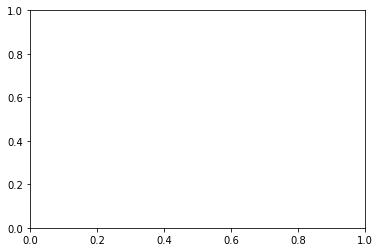

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 13

# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

fig, ax = plt.subplots()

n_splits=10
max_train_size = 3
test_size = 1

cv = TimeSeriesSplitCustom(n_splits=n_splits, test_size=20, min_train_size=12)
plot_cv_indices(cv.split(values), n_splits=10, max_train_size = 3)#(cv, X, y, groups, ax, n_splits)
plt.show()

In [67]:
from sklearn.model_selection._split import TimeSeriesSplit
from sklearn.utils.validation import _deprecate_positional_args

from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples

class WindowedTestTimeSeriesSplit(TimeSeriesSplit):
    """
    parameters
    ----------
    n_test_folds: int
        number of folds to be used as testing at each iteration.
        by default, 1.
    """
    @_deprecate_positional_args
    def __init__(self, n_splits=5, *, max_train_size=None, n_test_folds=1):
        super().__init__(n_splits, max_train_size=max_train_size)
        self.n_test_folds=n_test_folds

    def split(self, X, y=None, groups=None):
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """
        X, y, groups = indexable(X, y, groups)
        n_samples = _num_samples(X)
        n_splits = self.n_splits
        n_folds = n_splits + self.n_test_folds
        if n_folds > n_samples:
            raise ValueError(
                ("Cannot have number of folds ={0} greater"
                 " than the number of samples: {1}.").format(n_folds,
                                                             n_samples))
        indices = np.arange(n_samples)
        fold_size = (n_samples // n_folds)
        test_size = fold_size * self.n_test_folds # test window
        test_starts = range(fold_size + n_samples % n_folds,
                            n_samples-test_size+1, fold_size) # splits based on fold_size instead of test_size
        for test_start in test_starts:
            if self.max_train_size and self.max_train_size < test_start:
                yield (indices[test_start - self.max_train_size:test_start],
                       indices[test_start:test_start + test_size])
            else:
                yield (indices[:test_start],
                       indices[test_start:test_start + test_size])



In [74]:
import numpy as np

tscv = WindowedTestTimeSeriesSplit(n_splits=4, max_train_size=3, n_test_folds=1)
print(tscv)

# for train_index, test_index in tscv.split(df):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

df3 = tscv.split(df)
df3

WindowedTestTimeSeriesSplit(max_train_size=3, n_splits=4, n_test_folds=1)


<generator object WindowedTestTimeSeriesSplit.split at 0x7f16482ea820>

In [ ]:
series = Series.from_csv('sunspots.csv', header=0)
X = series.values
n_splits=10
n_train=3
n_test=1
fold=1
n_records = len(X)
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
	print('train=%d, test=%d' % (len(train), len(test)))

In [63]:
X = df.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

In [ ]:
prediction = []
data = train.values
for t In test.values:
    model = (ExponentialSmoothing(data).fit())
    y = model.predict()
    prediction.append(y[0])
    data = numpy.append(data, t)

    
test_ = pandas.DataFrame(test)
test_['predictionswf'] = prediction
plt.plot(test_['T'])
plt.plot(test_.predictionswf, '--')
plt.show()
error = sqrt(metrics.mean_squared_error(test.values,prediction))
print ('Test RMSE for Triple Exponential Smoothing with Walk-Forward Validation: ', error)